In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from collections import deque

### Visualising the Sudoku matrix

We define a function to produce an elegant visual representation of the sudoku matrix with matplotlib

In [2]:
def visualize_sudoku(board):
    fig, ax = plt.subplots()

    # Set minor grid lines
    ax.set_xticks(np.arange(-0.5, 9, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 9, 1), minor=True)
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.5)  # Set minor grid lines

    # Custom thicker grid lines for major grids
    for i in range(0, 10, 3):
        ax.axhline(i-0.5, color='black', linewidth=2)  # Horizontal lines
        ax.axvline(i-0.5, color='black', linewidth=2)  # Vertical lines

    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] != 0:
                ax.text(j, 8-i, str(board[i][j]), va='center', ha='center', fontsize=14)  # Reversed row index

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')

    plt.show()

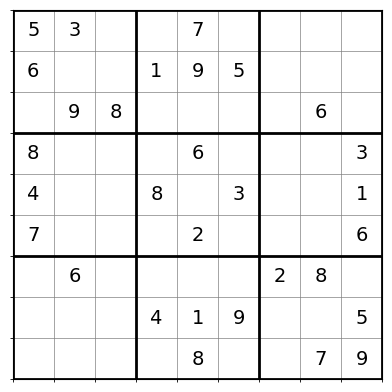

In [3]:
#simple sudoku matrix from google
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]


visualize_sudoku(sudoku_board)

## Sudoku as a Constraint Satisfaction Problem

- The current state of the Sudoku Board is determined by its variables. 
- In the case of Sudoku, there are 81 variables, which are the individual cells in the board.
- The variables have values in the domain {1,2,3 ... 7,8,9}
- The constraints are the rules of sudoku: 
    - No repeat number in the same row
    - No repeat number in the same column
    - No repeat number in the same grid

### Helper functions for search algorithms

Below are some utility functions that will be used for our search algorithms

In [4]:
def find_empty_cell(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None, None  # No empty cell found

def is_valid_move(board, row, col, num):
    # Check row and column
    if num in board[row] or num in [board[i][col] for i in range(9)]:
        return False
    
    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    
    return True

def get_possible_values(board, row, col):
        possible_values = set(range(1, 10))
        for i in range(9):
            possible_values.discard(board[i][col])
            possible_values.discard(board[row][i])
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                possible_values.discard(board[i][j])
        return possible_values

## Solving Sudoku with BFS

There is no need to generate a graph when solving with BFS as each individual state of the board can be explored by filling in one variable (cell) at a time. When we reach the state of all cells being filled, the Sudoku problem is solved. 

Depth 0: pushed 1 into [0][2]
Depth 0: pushed 2 into [0][2]
Depth 0: pushed 4 into [0][2]
Depth 1: pushed 2 into [0][3]
Depth 1: pushed 6 into [0][3]
Depth 1: pushed 6 into [0][3]
Depth 1: pushed 2 into [0][3]
Depth 1: pushed 6 into [0][3]
Depth 2: pushed 4 into [0][5]
Depth 2: pushed 6 into [0][5]
Depth 2: pushed 8 into [0][5]
Depth 2: pushed 2 into [0][5]
Depth 2: pushed 4 into [0][5]
Depth 2: pushed 8 into [0][5]
Depth 2: pushed 4 into [0][5]
Depth 2: pushed 8 into [0][5]
Depth 2: pushed 6 into [0][5]
Depth 2: pushed 8 into [0][5]
Depth 2: pushed 2 into [0][5]
Depth 2: pushed 8 into [0][5]
Depth 3: pushed 8 into [0][6]
Depth 3: pushed 9 into [0][6]
Depth 3: pushed 4 into [0][6]
Depth 3: pushed 8 into [0][6]
Depth 3: pushed 9 into [0][6]
Depth 3: pushed 4 into [0][6]
Depth 3: pushed 9 into [0][6]
Depth 3: pushed 4 into [0][6]
Depth 3: pushed 8 into [0][6]
Depth 3: pushed 9 into [0][6]
Depth 3: pushed 8 into [0][6]
Depth 3: pushed 9 into [0][6]
Depth 3: pushed 4 into [0][6]
Depth 3: p

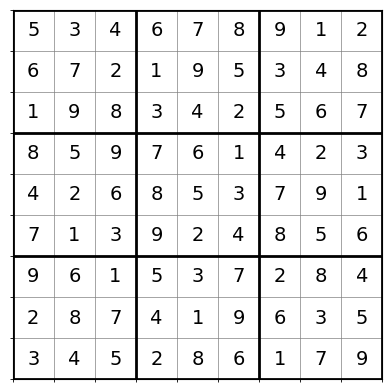

In [5]:
# BFS
def solve_sudoku_bfs(board):
    queue = deque([(board, 0)])  # Queue of (board state, depth) tuples
    
    
    while queue:
        current_board, depth = queue.popleft()
        row, col = find_empty_cell(current_board)
        
        if row is None and col is None:
            return current_board # Solution found
        
        for num in range(1, 10):
            if is_valid_move(current_board, row, col, num):
                new_board = [row[:] for row in current_board]  # Create a copy
                new_board[row][col] = num
                print(f"Depth {depth}: pushed {num} into [{row}][{col}]")
                queue.append((new_board, depth + 1))

    return None  # No solution found

# Solving and displaying the board
board_copy = copy.deepcopy(sudoku_board)
solution = solve_sudoku_bfs(board_copy)
if solution:
    print("BFS Solution found:")
    visualize_sudoku(solution)
else:
    print("No solution found.")

## Solving Sudoku with Backtracking search

Again, there is no need to generate a graph when solving with Backtracking as each individual state of the board can be explored by filling in one variable (cell) at a time. When we reach the state of all cells being filled, the Sudoku problem is solved. The difference here is that we use Depth-First Search and we implement it recursively, but backtracking whenever a constraint is violated. 

Depth 0: Pushed 1 into [0][2]
Depth 1: Pushed 2 into [0][3]
Depth 2: Pushed 4 into [0][5]
Depth 3: Pushed 8 into [0][6]
Depth 4: Pushed 9 into [0][7]
Backtracked
Backtracked
Depth 3: Pushed 9 into [0][6]
Backtracked
Backtracked
Depth 2: Pushed 6 into [0][5]
Depth 3: Pushed 4 into [0][6]
Depth 4: Pushed 9 into [0][7]
Depth 5: Pushed 8 into [0][8]
Depth 6: Pushed 2 into [1][1]
Depth 7: Pushed 4 into [1][2]
Depth 8: Pushed 3 into [1][6]
Backtracked
Depth 8: Pushed 7 into [1][6]
Depth 9: Pushed 3 into [1][7]
Backtracked
Backtracked
Backtracked
Depth 7: Pushed 7 into [1][2]
Depth 8: Pushed 3 into [1][6]
Backtracked
Backtracked
Backtracked
Depth 6: Pushed 4 into [1][1]
Depth 7: Pushed 2 into [1][2]
Depth 8: Pushed 3 into [1][6]
Backtracked
Depth 8: Pushed 7 into [1][6]
Depth 9: Pushed 3 into [1][7]
Backtracked
Backtracked
Backtracked
Depth 7: Pushed 7 into [1][2]
Depth 8: Pushed 3 into [1][6]
Depth 9: Pushed 2 into [1][7]
Backtracked
Backtracked
Backtracked
Backtracked
Depth 6: Pushed 7 into

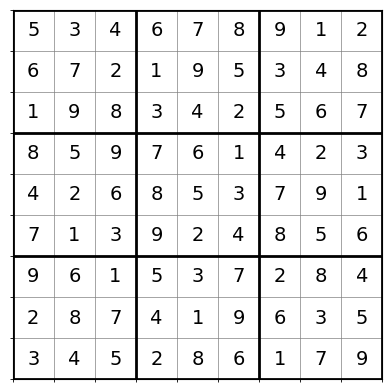

In [6]:
def solve_sudoku_backtracking(board):
    def solve(depth):
        row, col = find_empty_cell(board)
        if row is None and col is None:
            return True  # Solution found
        
        for num in range(1, 10):
            if is_valid_move(board, row, col, num):
                board[row][col] = num
                print(f"Depth {depth}: Pushed {num} into [{row}][{col}]")
                if solve(depth + 1):
                    return True
                board[row][col] = 0  # Backtrack
                print("Backtracked")
        return False  # No valid move for this cell

    if solve(0):  # Start with depth 0
        return board
    else:
        return None

# Solving and displaying the board with backtracking
board_copy = copy.deepcopy(sudoku_board)
solution = solve_sudoku_backtracking(board_copy)
if solution:
    print("Backtracking Solution found:")
    visualize_sudoku(solution)
else:
    print("No solution found.")


## Solving Sudoku with Greedy Search

In the context of Sudoku, a greedy search algorithm might select the best possible move based on some heuristic, such as selecting the cell with the fewest remaining possible values. In sudoku, there will always be cells with a possible move of 1 only. As such, we are able to solve the puzzle much faster by filling in these cells first, and in turn, it reduces the number of possibilities of other cells.

Depth 0: Push 5 into [4][4]
Depth 1: Push 2 into [4][1]
Depth 2: Push 9 into [4][7]
Depth 3: Push 6 into [4][2]
Depth 4: Push 7 into [4][6]
Depth 5: Push 9 into [5][3]
Depth 6: Push 7 into [3][3]
Depth 7: Push 3 into [6][4]
Depth 8: Push 4 into [2][4]
Depth 9: Push 2 into [2][5]
Depth 10: Push 6 into [0][3]
Depth 11: Push 8 into [0][5]
Depth 12: Push 1 into [2][0]
Depth 13: Push 3 into [2][3]
Depth 14: Push 5 into [2][6]
Depth 15: Push 7 into [2][8]
Depth 16: Push 4 into [3][6]
Depth 17: Push 1 into [3][5]
Depth 18: Push 5 into [3][1]
Depth 19: Push 9 into [3][2]
Depth 20: Push 2 into [3][7]
Depth 21: Push 1 into [5][1]
Depth 22: Push 3 into [5][2]
Depth 23: Push 4 into [5][5]
Depth 24: Push 8 into [5][6]
Depth 25: Push 3 into [1][6]
Depth 26: Push 4 into [1][7]
Depth 27: Push 1 into [0][7]
Depth 28: Push 9 into [0][6]
Depth 29: Push 2 into [0][8]
Depth 30: Push 4 into [0][2]
Depth 31: Push 7 into [1][1]
Depth 32: Push 2 into [1][2]
Depth 33: Push 8 into [1][8]
Depth 34: Push 5 into [5

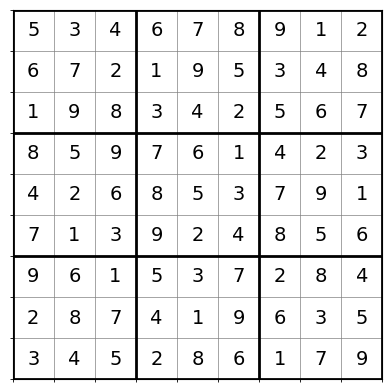

In [7]:
def solve_sudoku_greedy(board): 
    def find_next_cell(board):
        min_possible_values = float('inf')
        next_cell = None
        for i in range(9):
            for j in range(9):
                if board[i][j] == 0: #checks for empty cell in board 
                    num_possible_values = len(get_possible_values(board, i, j)) #find the number of possible values
                    if num_possible_values < min_possible_values:
                        min_possible_values = num_possible_values #if this particular cell has less possibilities 
                        next_cell = (i, j)                        #than the previous next_cell, it is the new next_cell
        return next_cell

    def solve(depth):
        next_cell = find_next_cell(board)
        if next_cell is None:
            return True  # Solution found
        
        row, col = next_cell
        possible_values = get_possible_values(board, row, col)
        for num in possible_values:
            if is_valid_move(board, row, col, num):
                board[row][col] = num
                print(f"Depth {depth}: Push {num} into [{row}][{col}]")
                if solve(depth + 1):
                    return True  # Solution found
                board[row][col] = 0  # Backtrack
                print("Backtracked")
        return False  # No valid move for this cell

    if solve(0):
        return board
    else:
        return None

# Solving and displaying the board
board_copy = copy.deepcopy(sudoku_board)
solution = solve_sudoku_greedy(board_copy)
if solution:
    print("Greedy Search Solution found:")
    visualize_sudoku(solution)
else:
    print("No solution found.")


## Solving Sudoku with A* Search

An A* search algorithm will move to the next state of the board with the lowest total cost. In A* search, total cost = cost of edge + estimated cost of path

In the context of Sudoku, cost of edge is defined earlier as the number of possible values for a given cell. The cost of the path can be determined by comparing the number of unsolved cells impacted. The more cells impacted, the lower the cost since it means that there are less total possibilities in that given state.

For the algorithm, we want to prioritise choosing cells with the least number of possibilities, instead of blindly taking the total cost, as we want to reduce the amount of backtracking. However, instead of randomly choosing the cell amongst the lowest possibility cells, we want to choose cells that have the most impact in terms of how many unsolved cells are in the same row, col or grid as itself


Depth 0: Push 7 into [6][5]
Depth 1: Push 3 into [7][7]
Depth 2: Push 6 into [7][6]
Depth 3: Push 5 into [4][4]
Depth 4: Push 9 into [5][3]
Depth 5: Push 7 into [3][3]
Depth 6: Push 2 into [4][1]
Depth 7: Push 9 into [4][7]
Depth 8: Push 6 into [4][2]
Depth 9: Push 7 into [4][6]
Depth 10: Push 4 into [6][8]
Depth 11: Push 1 into [8][6]
Depth 12: Push 2 into [7][0]
Depth 13: Push 1 into [2][0]
Depth 14: Push 7 into [7][2]
Depth 15: Push 8 into [7][1]
Depth 16: Push 3 into [6][4]
Depth 17: Push 4 into [2][4]
Depth 18: Push 2 into [2][5]
Depth 19: Push 6 into [0][3]
Depth 20: Push 8 into [0][5]
Depth 21: Push 2 into [0][8]
Depth 22: Push 4 into [1][7]
Depth 23: Push 4 into [0][2]
Depth 24: Push 9 into [0][6]
Depth 25: Push 2 into [1][2]
Depth 26: Push 5 into [5][7]
Depth 27: Push 4 into [3][6]
Depth 28: Push 1 into [5][1]
Depth 29: Push 6 into [8][5]
Depth 30: Push 5 into [3][1]
Depth 31: Push 4 into [8][1]
Depth 32: Push 1 into [0][7]
Depth 33: Push 9 into [3][2]
Depth 34: Push 8 into [5

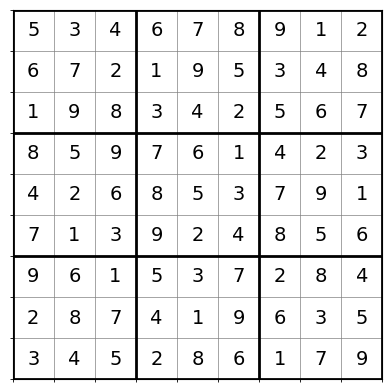

In [8]:
def solve_sudoku_astar(board):
    def calculate_impact_count(board, row, col):
        impact_count = 0

        # Check grid
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                if board[i][j] == 0:
                    impact_count += 1

        # Check row excluding cells within the same grid
        for i in range(9):
            if board[row][i] == 0 and (i < start_col or i >= start_col + 3):
                impact_count += 1

        # Check column excluding cells within the same grid
        for i in range(9):
            if board[i][col] == 0 and (i < start_row or i >= start_row + 3):
                impact_count += 1

        return impact_count

    
    def find_next_cell():
        
        min_possible_values = float('inf')
        cells_with_min_values = []
        for i in range(9):
            for j in range(9):
                if board[i][j] == 0:
                    num_possible_values = len(get_possible_values(board, i, j))
                    if num_possible_values < min_possible_values:
                        min_possible_values = num_possible_values
                        cells_with_min_values = [(i, j)]
                    elif num_possible_values == min_possible_values:
                        cells_with_min_values.append((i, j))
        max_impact = -1
        next_cell = None
        for cell in cells_with_min_values:
            impact_count = calculate_impact_count(board, cell[0], cell[1])
            if impact_count > max_impact:
                max_impact = impact_count
                next_cell = cell
        return next_cell

    def solve(depth):
        empty_row, empty_col = find_empty_cell(board)
        if empty_row is None:
            return True  # Solution found
        
        next_cell = find_next_cell()
        row, col = next_cell
        
        possible_values = get_possible_values(board, row, col)
        for num in possible_values:
            if is_valid_move(board, row, col, num):
                board[row][col] = num
                print(f"Depth {depth}: Push {num} into [{row}][{col}]")
                if solve(depth+1):
                    return True  # Solution found
                board[row][col] = 0  # Backtrack
                print("Backtracked")
        return False  # No solution found


    if solve(0):
        return board
    else:
        return None
    
# Solving and displaying the board
board_copy = copy.deepcopy(sudoku_board)
solution = solve_sudoku_astar(board_copy)
if solution:
    print("A* Search Solution found:")
    visualize_sudoku(solution)
else:
    print("No solution found.")